## HW1 - generate block simulation data and solve for the parameters

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import MatrixMethods as mm
from SingleImage import SingleImage
from ImageBlock import ImageBlock
from BlockSimulation import *
from scipy import linalg as la


# Set print options to suppress scientific notation
np.set_printoptions(suppress=True)

## Part 1 - Simulate block of images

In [2]:
# define random seed
np.random.seed(0)

a = SimulateBlock(50, (36, 24), overlap=0.6 , num_images=2, tie_pattern='3 mid frame', control_pattern='random block',num_control_points=4, rotaions_sigma=10, altitude=1000)

block = a.simulate_block()

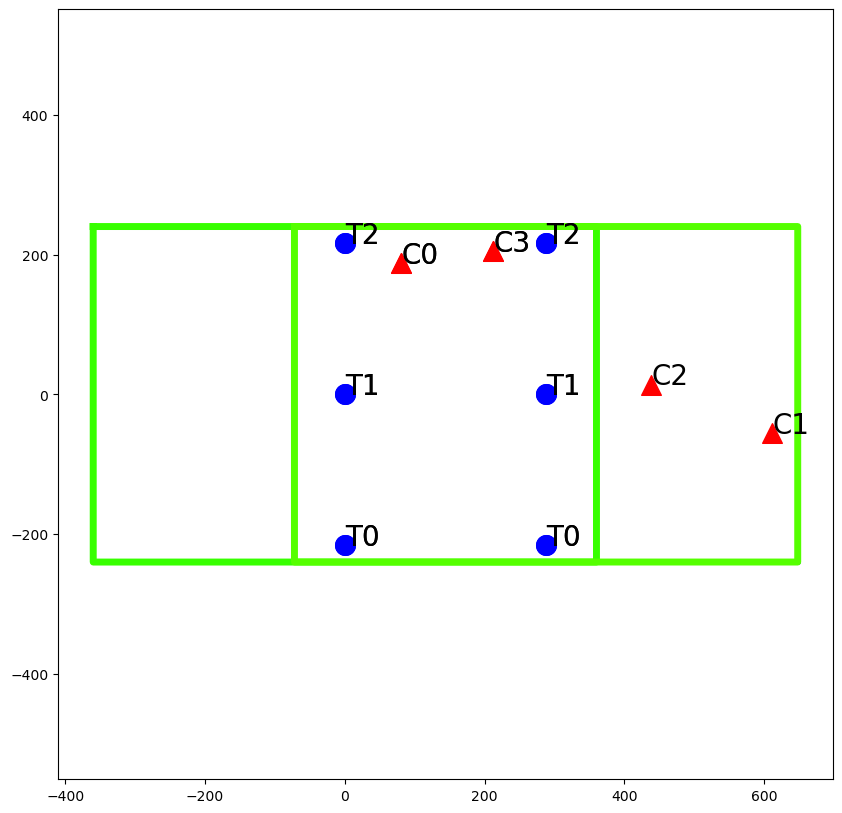

In [3]:
ax = block.draw_block(anotate=True)
ax.axis('equal')
plt.show()

In [4]:
block.describe_block()

Images EOP:
   Image     X0   Y0      Z0     omega       phi     kappa
0    0.0    0.0  0.0  1000.0  0.000086  0.000019  0.000047
1    1.0  288.0  0.0  1000.0  0.000109  0.000091 -0.000047

Tie points:
   x     y name image_id           X           Y    Z  num_images
0  0 -10.8   T0        0   -0.009151 -215.910488  0.0           2
1  0   0.0   T1        0   -0.019400    0.085524  0.0           2
2  0  10.8   T2        0   -0.029650  216.089516  0.0           2
3  0 -10.8   T0        1  287.899227 -215.886293  0.0           2
4  0   0.0   T1        1  287.909458    0.108642  0.0           2
5  0  10.8   T2        1  287.919690  216.113713  0.0           2

Control points:
            X           Y name  Z
0   81.029351  188.183455   C0  0
1  611.292027  -55.850271   C1  0
2  437.985823   13.977266   C2  0
3  212.525034  204.421104   C3  0


## Part 2 - Bundle Adjustment

In [5]:
img = block.images[0]
Compute3DRotationMatrix(*img.exteriorOrientationParameters[3:])

array([[ 1.        , -0.00004745,  0.0000194 ],
       [ 0.00004745,  1.        , -0.00008552],
       [-0.0000194 ,  0.00008552,  1.        ]], dtype=float32)

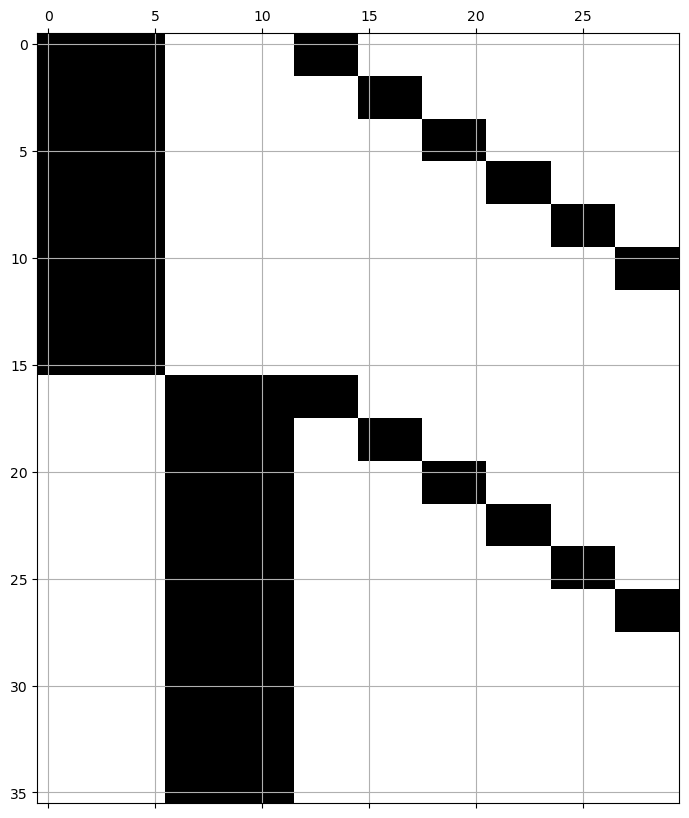

In [6]:
# drawing A matrix
A = block.ComputeDesignMatrix()
plt.figure(figsize=(10,10))
plt.spy(A)
plt.grid()
plt.show()

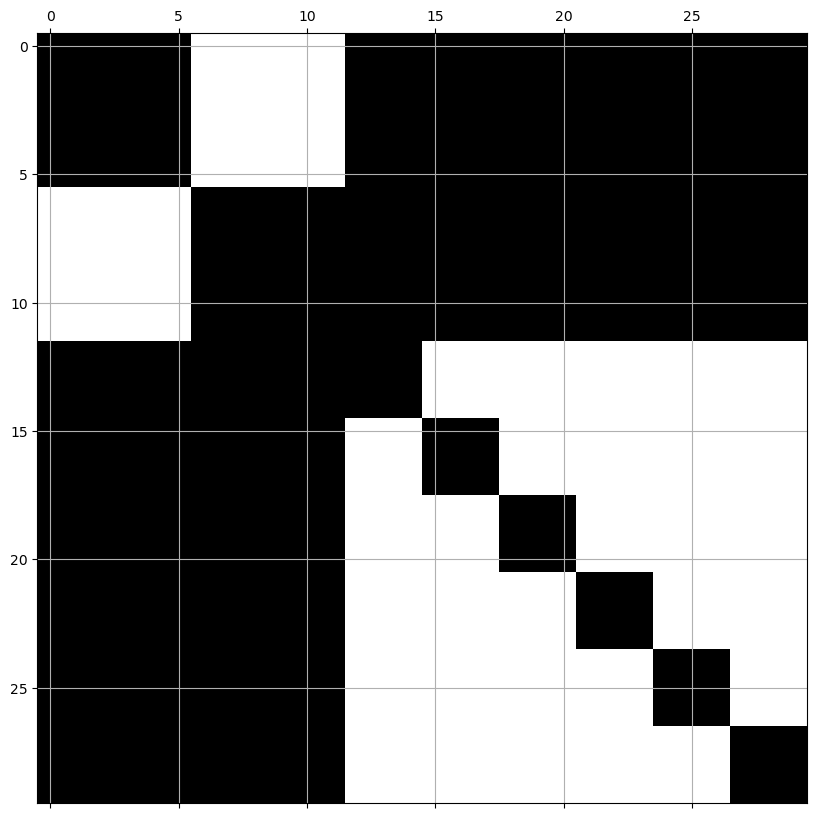

In [7]:
# drawing A matrix
N = np.dot(A.T, A)
plt.figure(figsize=(10,10))
plt.spy(N)
plt.grid()
plt.show()

In [8]:
X = block.compute_variables_vector()

In [9]:
X

array([   0.        ,    0.        , 1000.        ,    0.00008552,
          0.0000194 ,    0.00004745,  288.        ,    0.        ,
       1000.        ,    0.00010864,    0.00009054,   -0.00004738,
         -0.00915068, -215.91048775,    0.        ,   -0.01940017,
          0.08552367,    0.        ,   -0.02965004,  216.08951556,
          0.        ,  287.89922657, -215.88629252,    0.        ,
        287.90945823,    0.10864157,    0.        ,  287.91969038,
        216.11371281,    0.        ])

In [10]:
lb = block.create_lb_vector()
l0 = block.compute_observation_vector()

In [11]:
lb = lb.astype(np.float64)

In [12]:
len(lb)/2

18.0

In [13]:
print(np.round(lb,3))
print()
# rounding l0 to 3 digits after the decimal point
print(np.round(l0,3))


[  0.    -10.8     0.     -0.      0.     10.8    14.396 -10.8    14.397
   0.     14.397  10.801   4.053   9.405  10.628  10.216 -14.395 -10.802
 -14.396  -0.002 -14.397  10.798  -0.    -10.8    -0.      0.     -0.
  10.8   -10.344   9.403  16.17   -2.797   7.504   0.694  -3.77   10.215]

[  0.    -10.8     0.     -0.      0.     10.8    14.396 -10.8    14.397
   0.     14.397  10.801   4.053   9.405  10.628  10.216 -14.395 -10.802
 -14.396  -0.002 -14.397  10.798  -0.    -10.8    -0.      0.     -0.
  10.8   -10.344   9.403  16.17   -2.797   7.504   0.694  -3.77   10.215]


In [14]:
block.images[0].tie_points

,x,y,name,image_id,X,Y,Z,num_images,tie_block_id
0,5.326762e-12,-1.080000e+01,T0,0,-0.009151,-215.910488,0.0,1,0
1,6.123173e-12,-1.748876e-10,T1,0,-0.019400,0.085524,0.0,1,1
2,6.919584e-12,1.080000e+01,T2,0,-0.029650,216.089516,0.0,1,2
3,1.439577e+01,-1.079953e+01,T0,1,287.899227,-215.886293,0.0,1,3
4,1.439652e+01,4.727779e-04,T1,1,287.909458,0.108642,0.0,1,4
5,1.439728e+01,1.080059e+01,T2,1,287.919690,216.113713,0.0,1,5


In [30]:
a = SimulateBlock(50, (36, 24), overlap=0.6 , num_images=2, tie_pattern='3 mid frame', control_pattern='random block',num_control_points=10, rotaions_sigma=50, altitude=100)

block = a.simulate_block()
SimulateBlock.add_noise_to_block(block, sigma_location=1, sigma_rotation=50, sigma_tie_points=0, sigma_control_points=0)
X,RMSE,sigmaX = block.BundleAdjustment(1,1000)

iteration:  1 norm(A):  380.18847632245445 norm(X):  158.4652505803041 norm(L):  4.401269377691629
EOP:  [  0.26225487   0.10055642 101.50065676  -0.00029672  -0.00011712
  -0.00011013  26.60887646   0.09259097  98.72387218  -0.00005137
  -0.00035736  -0.00012501]
iteration:  1 RMSE:  2.8352349167484052e-05 norm(dx):  2.9446175105927095
iteration:  2 norm(A):  380.13430891115604 norm(X):  158.66479949124678 norm(L):  0.056710836081764034
EOP:  [-0.00466223 -0.00299779 99.97753973  0.00015469 -0.0002363  -0.00007532
 28.77006471  0.00034846 99.98469389 -0.00012056 -0.00000661  0.00004271]
iteration:  2 RMSE:  2.2820780330903432e-08 norm(dx):  0.040804944826151865


In [28]:
print(a.images[0].exteriorOrientationParameters, '\n')
# print(a.images_noisy[0].exteriorOrientationParameters, '\n')
print(block.images[0].exteriorOrientationParameters)

[  0.           0.         100.          -0.00015902   0.0003011
  -0.00035599] 

[ -0.43092747  -1.69588498 100.04872487   0.01673403  -0.00349976
   0.00080038]
